In [14]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X, y = load_breast_cancer().data, load_breast_cancer().target
df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

In [3]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

# PCA

---

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [10]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

pca = PCA(n_components=X_train.shape[1])
pca_tranformation = pca.fit_transform(scaler_X_train)


In [12]:
#pca._variance_explained_ratio_

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

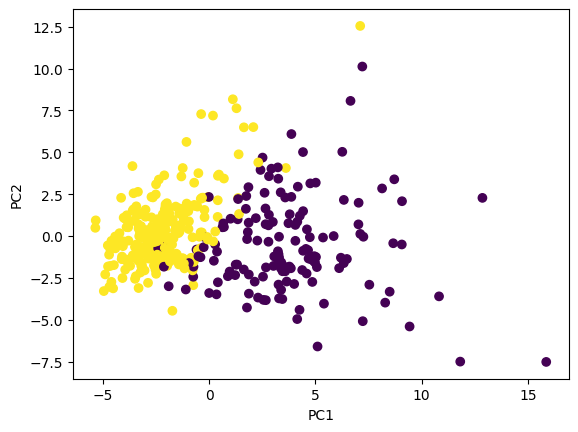

In [18]:
#proportion_variance_explained
ax = plt.axes()
ax.scatter(pca_tranformation[:,0], pca_tranformation[:,1], c=y_train)
ax.set(xlabel="PC1", ylabel="PC2")

In [20]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.6305691120532213

In [21]:
pca.explained_variance_ratio_[:10].sum()

0.9519192316813496

## PCA in a pipeline

---

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



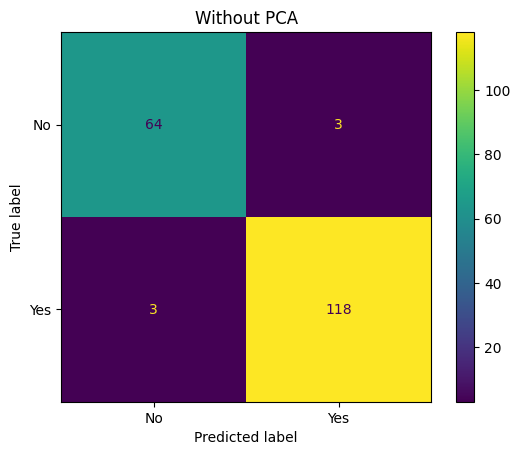

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
)

def evaluate_model(model, title = ""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred));
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
    plt.title(title)

pipe_with_PCA = Pipeline(
    [
        ("scaling", StandardScaler()),
        ("dimension_reduction", PCA(10)),
        ("svm", LinearSVC(max_iter=10000)),
    ],
)

pipe_no_PCA = Pipeline(
    [("scaling", StandardScaler()), ("svm", LinearSVC(max_iter=10000))]
)

evaluate_model(pipe_no_PCA, "Without PCA")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



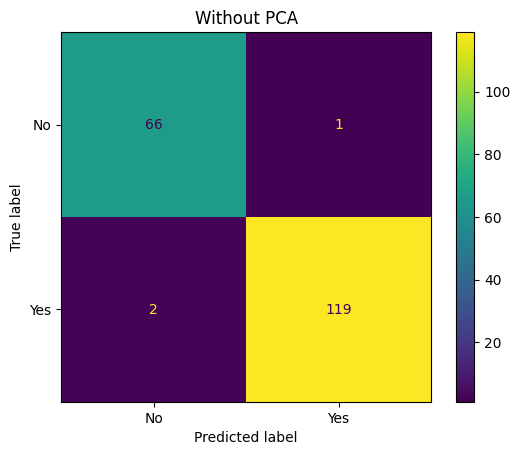

In [23]:
evaluate_model(pipe_with_PCA, "Without PCA")